### 12.2 Term Project

Hypothesis: Removing free international calling from customers plan, would not have a negative impact on customer loyalty.

A small telecommunications company that primarily offers home based service is looking to cut their international roaming costs by passing some of the expense on to the customer. Free international calling is a free service/feature in current state, but the stakeholders would like to know the potential impact to charging the customer.

In [10]:
import pandas as pd

# Import CSV file
rawPhoneData = pd.read_csv('phonedata.csv')

# Print the first 5 rows of the data
rawPhoneData.head(100)

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,UT,61,area_code_510,yes,no,0,78.2,103,13.29,195.9,149,16.65,108.0,100,4.86,10.1,6,2.73,2
96,97,NM,65,area_code_415,no,no,0,148.7,80,25.28,259.0,94,22.02,149.5,107,6.73,12.7,6,3.43,2
97,98,NJ,123,area_code_408,no,no,0,159.5,77,27.12,303.8,92,25.82,226.9,120,10.21,12.0,4,3.24,0
98,99,RI,53,area_code_408,no,yes,18,146.8,107,24.96,310.0,84,26.35,178.7,130,8.04,7.2,7,1.94,0


#### Let's clean up and summarize the data a bit. 

In [11]:
# adding 'sum' columns for total minutes both domestic and international
rawPhoneData['total_minutes'] = rawPhoneData['total_day_minutes'] + rawPhoneData['total_eve_minutes']+ rawPhoneData['total_night_minutes']
rawPhoneData.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_minutes
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,707.2
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,647.9
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,...,76,26.11,203.0,99,9.14,13.1,6,3.54,4,630.9
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,...,111,18.55,129.6,121,5.83,8.1,3,2.19,3,538.5
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,...,112,23.55,250.7,115,11.28,15.5,5,4.19,3,652.1


In [12]:
# adding 'sum' columns for total calls both domestic and international
rawPhoneData['total_domestic_calls'] = rawPhoneData['total_day_calls'] + rawPhoneData['total_eve_calls']+ rawPhoneData['total_night_calls']
rawPhoneData.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_minutes,total_domestic_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,707.2,300
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,18.75,203.9,118,9.18,6.3,6,1.70,0,647.9,317
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,...,26.11,203.0,99,9.14,13.1,6,3.54,4,630.9,245
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,...,18.55,129.6,121,5.83,8.1,3,2.19,3,538.5,346
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,...,23.55,250.7,115,11.28,15.5,5,4.19,3,652.1,303


#### Key Data Points

State- This data is broken down my market, so I decided to group by state for stakeholders to easily identify their key market areas.

International Plan- The second most important variable for the stakeholders is if the customer already has an existing international plan.

Total Monthly Minutes- Usage variables make great visual indicators, so I included the total domestic minutes data.

Total International Minutes- Including the international calling usage is a great visual indicator for the stakeholders.

Total Domestic Calls- Including the number of independent calls made domestically shows volume or ‘quantity’ versus the qualitative comparison to minutes. Capturing the frequency, the customer is dialing domestically. 

Total International Calls- Including the number of independent calls made internationally shows volume or ‘quantity’ versus the qualitative comparison to minutes. Capturing the frequency, the customer is dialing internationally.

Number of Customer Service Calls- The customer service call data gives us the potential for escalation.


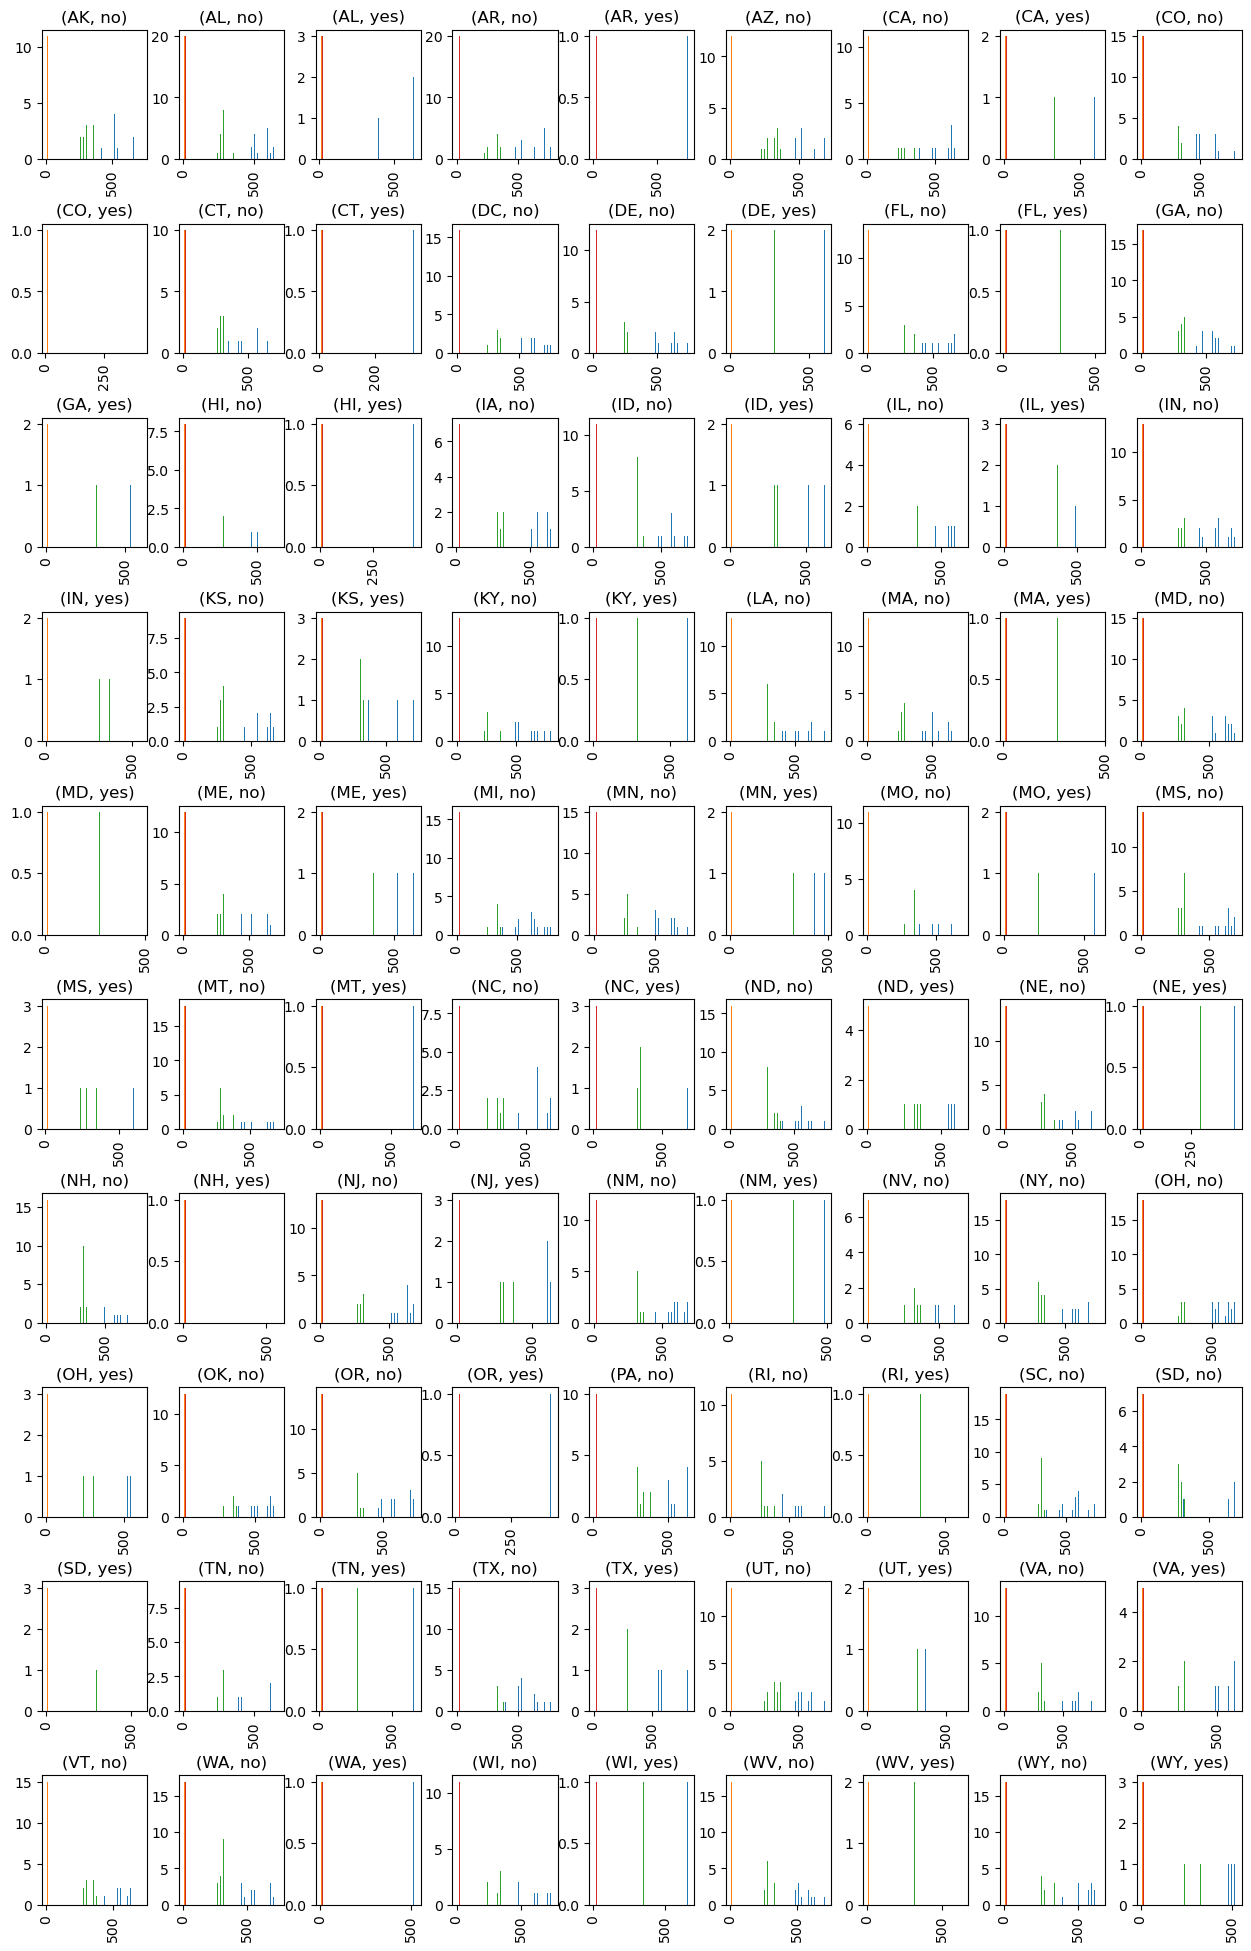

In [19]:
# histogram of key variables
import matplotlib.pyplot as plt

rawPhoneData.hist(column=['total_minutes', 'total_intl_minutes', 'total_domestic_calls', 'total_intl_calls'],
        by=['state', 'international_plan'], figsize=(15,25), bins=30)

# Display the histogram
plt.show()

In [20]:
# to help with outlier data, identifying the percentage of customer's calls were international. 
rawPhoneData['intl_to_domestic_ratio'] = rawPhoneData['total_intl_calls'] / rawPhoneData['total_domestic_calls'] * 100

In [22]:
rawPhoneData.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_minutes,total_domestic_calls,intl_to_domestic_ratio
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,244.7,91,11.01,10.0,3,2.70,1,707.2,300,1.000000
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,203.9,118,9.18,6.3,6,1.70,0,647.9,317,1.892744
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,...,203.0,99,9.14,13.1,6,3.54,4,630.9,245,2.448980
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,...,129.6,121,5.83,8.1,3,2.19,3,538.5,346,0.867052
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,...,250.7,115,11.28,15.5,5,4.19,3,652.1,303,1.650165


In [24]:
# Mean, Mode, Spread, and Tails

import numpy as np

mean_total_minutes = np.mean(rawPhoneData['total_minutes'])
mode_total_minutes = rawPhoneData['total_minutes'].mode()[0]
spread_total_minutes = np.std(rawPhoneData['total_minutes'])
tail_total_minutes = mean_total_minutes - mode_total_minutes

mean_total_domestic_calls = np.mean(rawPhoneData['total_domestic_calls'])
mode_total_domestic_calls = rawPhoneData['total_domestic_calls'].mode()[0]
spread_total_domestic_calls = np.std(rawPhoneData['total_domestic_calls'])
tail_total_domestic_calls = mean_total_domestic_calls - mode_total_domestic_calls

mean_intl_to_domestic_ratio = np.mean(rawPhoneData['intl_to_domestic_ratio'])
mode_intl_to_domestic_ratio = rawPhoneData['intl_to_domestic_ratio'].mode()[0]
spread_intl_to_domestic_ratio = np.std(rawPhoneData['intl_to_domestic_ratio'])
tail_intl_to_domestic_ratio = mean_intl_to_domestic_ratio - mode_intl_to_domestic_ratio

mean_total_international_calls = np.mean(rawPhoneData['total_intl_calls'])
mode_total_international_calls = rawPhoneData['total_intl_calls'].mode()[0]
spread_total_international_calls = np.std(rawPhoneData['total_intl_calls'])
tail_total_international_calls = mean_total_international_calls - mode_total_international_calls

# Print the results
print('Mean total minutes:', mean_total_minutes)
print('Mode total minutes:', mode_total_minutes)
print('Spread total minutes:', spread_total_minutes)
print('Tail total minutes:', tail_total_minutes)
print()
print('Mean total domestic calls:', mean_total_domestic_calls)
print('Mode total domestic calls:', mode_total_domestic_calls)
print('Spread total domestic calls:', spread_total_domestic_calls)
print('Tail total domestic calls:', tail_total_domestic_calls)
print()
print('Mean intl to domestic ratio:', mean_intl_to_domestic_ratio)
print('Mode intl to domestic ratio:', mode_intl_to_domestic_ratio)
print('Spread intl to domestic ratio:', spread_intl_to_domestic_ratio)
print('Tail intl to domestic ratio:', tail_intl_to_domestic_ratio)
print()
print('Mean total international calls:', mean_total_international_calls)
print('Mode total international calls:', mode_total_international_calls)
print('Spread total international calls:', spread_total_international_calls)
print('Tail total international calls:', tail_total_international_calls)

Mean total minutes: 583.3326666666667
Mode total minutes: 525.0
Spread total minutes: 90.43936627867805
Tail total minutes: 58.33266666666668

Mean total domestic calls: 301.36533333333335
Mode total domestic calls: 279
Spread total domestic calls: 33.04969790414969
Tail total domestic calls: 22.365333333333353

Mean intl to domestic ratio: 1.5066859650632172
Mode intl to domestic ratio: 0.9836065573770493
Spread intl to domestic ratio: 0.8441890858303025
Tail intl to domestic ratio: 0.5230794076861679

Mean total international calls: 4.485333333333333
Mode total international calls: 4
Spread total international calls: 2.420286117154103
Tail total international calls: 0.4853333333333332


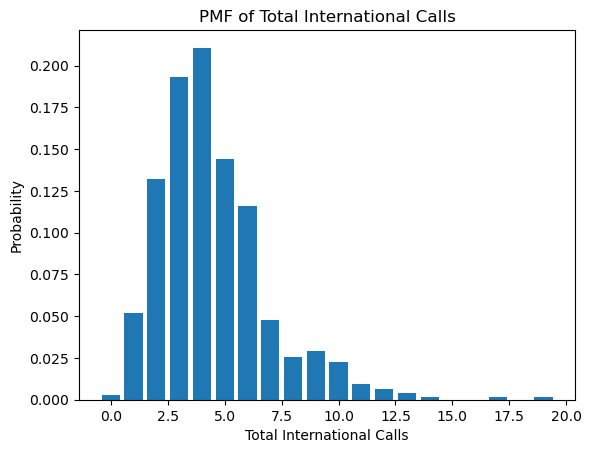

In [26]:
# PMF

pmf = rawPhoneData['total_intl_calls'].value_counts(normalize=True).sort_index()

# plot the PMF
plt.bar(pmf.index, pmf.values)
plt.xlabel('Total International Calls')
plt.ylabel('Probability')
plt.title('PMF of Total International Calls')
plt.show()

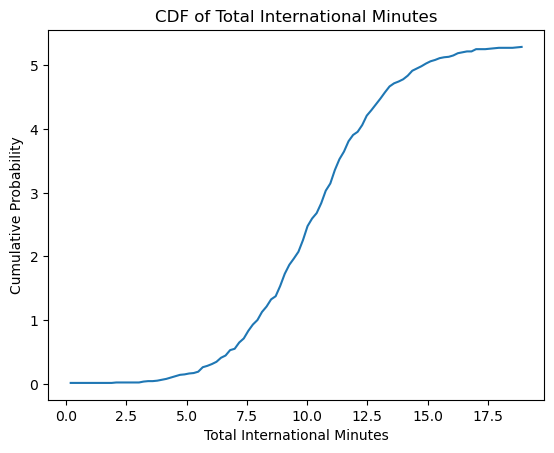

In [27]:
#CDF

# calculate the CDF of total_intl_minutes
total_intl_minutes = rawPhoneData['total_intl_minutes'].values
cdf = np.cumsum(np.histogram(total_intl_minutes, bins=100, density=True)[0])

# plot the CDF
plt.plot(np.histogram(total_intl_minutes, bins=100, density=True)[1][1:], cdf)
plt.xlabel('Total International Minutes')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Total International Minutes')
plt.show()

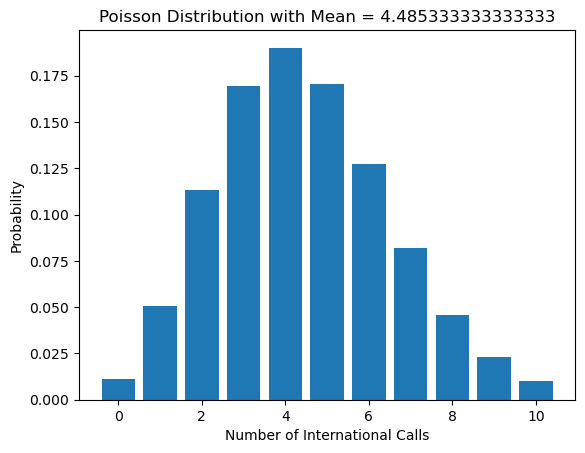

In [29]:
from scipy.stats import poisson

# calculate the mean of total_intl_calls
mean = np.mean(rawPhoneData.total_intl_calls)

# generate x values for plotting
x = np.arange(0, 11)

# calculate Poisson PMF for each x value
pmf = poisson.pmf(x, mean)

# plot Poisson PMF
plt.bar(x, pmf)
plt.xlabel('Number of International Calls')
plt.ylabel('Probability')
plt.title('Poisson Distribution with Mean = {}'.format(mean))
plt.show()

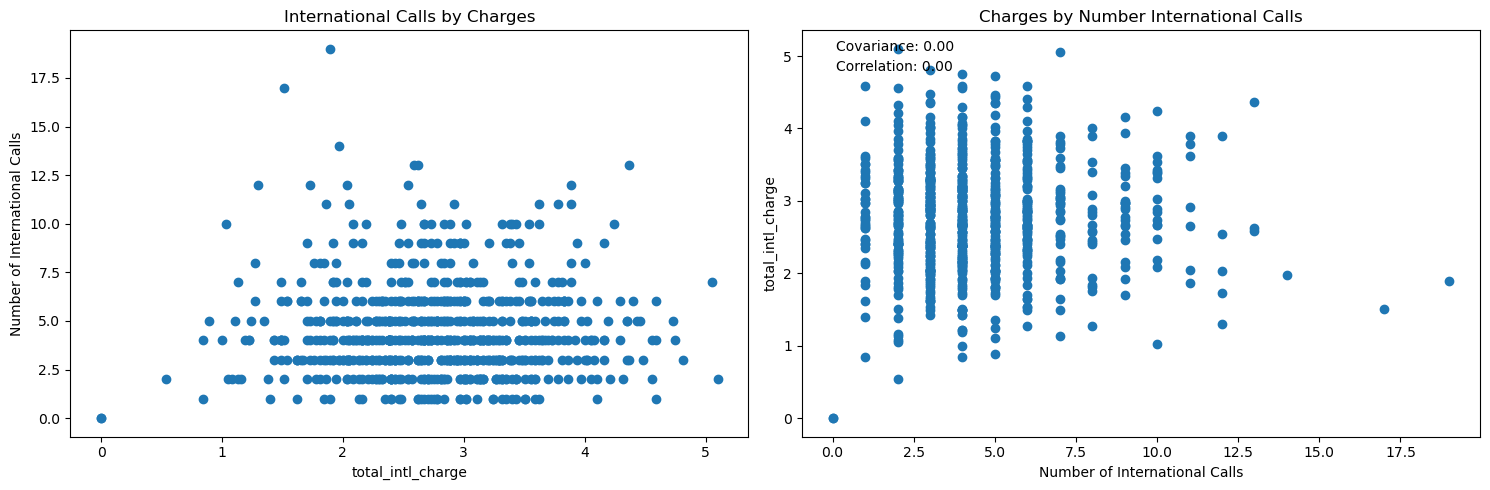

In [41]:

# Calculate covariance and Pearson's correlation coefficient
covariance = np.cov(rawPhoneData['total_intl_charge'], rawPhoneData['total_intl_calls'])[0][1]
correlation = np.corrcoef(rawPhoneData['total_intl_charge'], rawPhoneData['total_intl_calls'])[0][1]

# Create two scatter plots
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(rawPhoneData['total_intl_charge'], rawPhoneData['total_intl_calls'])
plt.title('International Calls by Charges')
plt.xlabel('total_intl_charge')
plt.ylabel('Number of International Calls')

plt.subplot(1, 2, 2)
plt.scatter(rawPhoneData['total_intl_calls'], rawPhoneData['total_intl_charge'])
plt.title('Charges by Number International Calls')
plt.xlabel('Number of International Calls')
plt.ylabel('total_intl_charge')

plt.tight_layout()

# Adding correlation and covariance information to the plot
plt.annotate('Covariance: {:.2f}'.format(covariance), xy=(0.05, 0.95), xycoords='axes fraction')
plt.annotate('Correlation: {:.2f}'.format(correlation), xy=(0.05, 0.90), xycoords='axes fraction')

plt.show()

In [43]:
# Hypothesis testing

import scipy.stats as stats

# Compute the mean of 'total_domestic_calls' and 'total_intl_calls'
mean_domestic = rawPhoneData['total_domestic_calls'].mean()
mean_intl = rawPhoneData['total_intl_calls'].mean()

# Compute the standard error of the mean
std_domestic = rawPhoneData['total_domestic_calls'].std()
std_intl = rawPhoneData['total_intl_calls'].std()
n_domestic = len(rawPhoneData['total_domestic_calls'])
n_intl = len(rawPhoneData['total_intl_calls'])
se_domestic = std_domestic / np.sqrt(n_domestic)
se_intl = std_intl / np.sqrt(n_intl)

# Compute the t statistic and p-value
diff = mean_domestic - mean_intl
se_diff = np.sqrt(se_domestic**2 + se_intl**2)
t_stat = diff / se_diff
p_value = stats.t.sf(np.abs(t_stat), n_domestic+n_intl-2) * 2

# Print the results
print('Mean of domestic calls:', mean_domestic)
print('Mean of international calls:', mean_intl)
print('Difference in means:', diff)
print('Standard error of difference:', se_diff)
print('t-statistic:', t_stat)
print('p-value:', p_value)

Mean of domestic calls: 301.36533333333335
Mean of international calls: 4.485333333333333
Difference in means: 296.88
Standard error of difference: 1.210843484732283
t-statistic: 245.18445508722377
p-value: 0.0


In [45]:
# regression analysis
import statsmodels.formula.api as smf

# Perform linear regression
results = smf.ols('total_domestic_calls ~ intl_to_domestic_ratio', data=rawPhoneData).fit()

# Print regression summary
print(results.summary())


                             OLS Regression Results                             
Dep. Variable:     total_domestic_calls   R-squared:                       0.039
Model:                              OLS   Adj. R-squared:                  0.038
Method:                   Least Squares   F-statistic:                     30.58
Date:                  Sun, 05 Mar 2023   Prob (F-statistic):           4.42e-08
Time:                          19:56:45   Log-Likelihood:                -3672.7
No. Observations:                   750   AIC:                             7349.
Df Residuals:                       748   BIC:                             7359.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercep